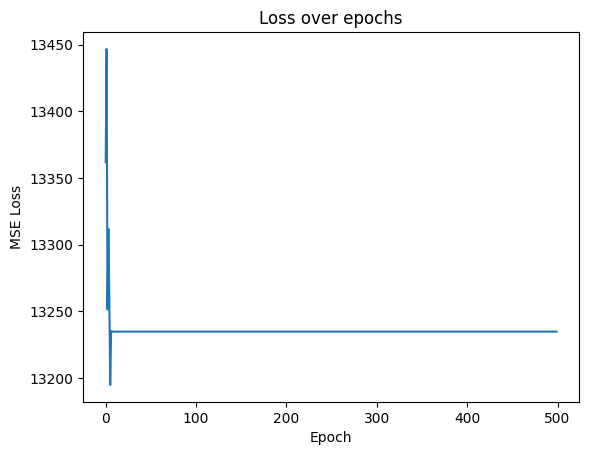

20°C to Fahrenheit: [[1.]]


In [2]:
import numpy as np
import matplotlib.pyplot as plt

class NeuralNetwork:
    def __init__(self, layer_sizes):
        self.weights = []
        self.biases = []
        self.activations = []
        for i in range(len(layer_sizes) - 1):
            weight = np.random.randn(layer_sizes[i], layer_sizes[i+1]) * 0.1
            bias = np.random.randn(layer_sizes[i+1]) * 0.1
            self.weights.append(weight)
            self.biases.append(bias)

    def forward(self, input_data):
        a = input_data
        self.activations = [a]
        for weight, bias in zip(self.weights, self.biases):
            z = np.dot(a, weight) + bias
            a = np.tanh(z)  # Usando tanh como función de activación
            self.activations.append(a)
        return a

    def mse_loss(self, y_true, y_pred):
        return ((y_true - y_pred) ** 2).mean()

    def train(self, input_data, target_data, learning_rate, epochs):
        loss_history = []
        for epoch in range(epochs):
            epoch_loss = 0
            for x, y in zip(input_data, target_data):
                # Forward pass
                output = self.forward(x)

                # Calcular la pérdida
                loss = self.mse_loss(y, output)
                epoch_loss += loss

                # Backpropagation
                gradient = 2 * (output - y)  # Derivada de MSE
                for i in reversed(range(len(self.weights))):
                    dW = np.outer(self.activations[i], gradient)
                    dB = gradient

                    if i > 0:
                        gradient = np.dot(gradient, self.weights[i].T) * (1 - self.activations[i-1] ** 2)

                    self.weights[i] -= learning_rate * dW
                    self.biases[i] -= learning_rate * dB

            epoch_loss /= len(input_data)
            loss_history.append(epoch_loss)
        return loss_history

    def predict(self, input_data):
        return self.forward(input_data)

# Crear una red con 1 capa oculta de 5 neuronas
nn = NeuralNetwork([1, 5, 1])

# Datos de entrenamiento (X en grados Celsius, Y en Fahrenheit)
X = np.array([[0], [100], [-40], [25]])
Y = np.array([[32], [212], [-40], [77]])

# Entrenar la red
loss_history = nn.train(X, Y, learning_rate=0.01, epochs=500)

# Visualizar la pérdida durante el entrenamiento
plt.plot(loss_history)
plt.title('Loss over epochs')
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.show()

# Realizar predicciones
input_data = np.array([[22]])  # Ejemplo: convertir 20°C a °F
predicted = nn.predict(input_data)
print(f"20°C to Fahrenheit: {predicted}")
